Valeurs nulles : brand           0
model           0
year            0
engine_size     0
fuel_type       0
transmission    0
mileage         0
car_type        0
drive_type      0
price           0
dtype: int64


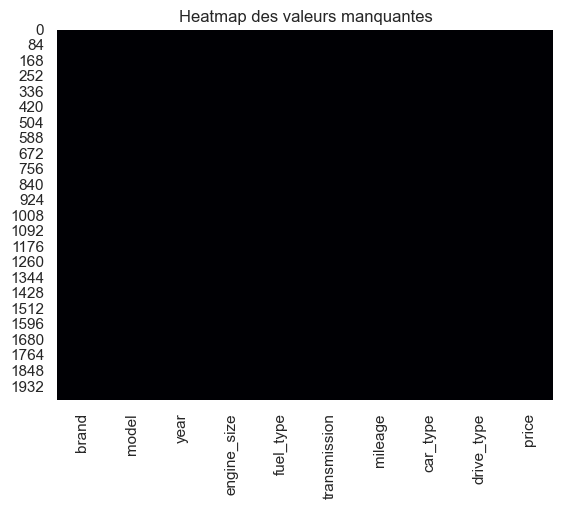

Forme après suppression des doublons : (2000, 10)


In [11]:
# Cellule 1 : Import et Inspection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('car_dataset_2000_rows.csv')

# 1. Vérification des nulls (Diagramme de distribution des manques)
print("Valeurs nulles :", df.isnull().sum())
sns.heatmap(df.isnull(), cmap='magma', cbar=False)
plt.title("Heatmap des valeurs manquantes")
plt.show()

# 2. Suppression des doublons (Méthode du prof)
df.drop_duplicates(keep=False, inplace=True)
print("Forme après suppression des doublons :", df.shape)

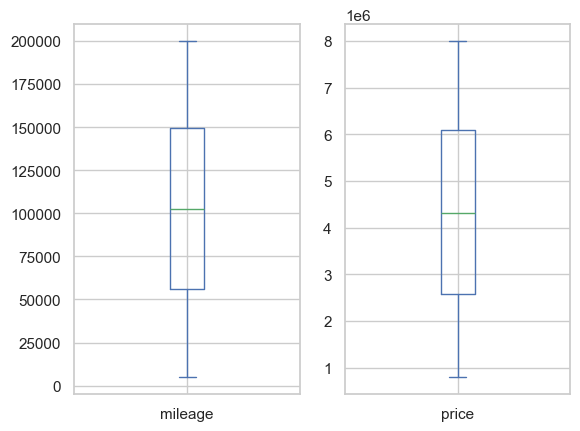

TypeError: percentile() got an unexpected keyword argument 'interpolation'

In [ ]:
# Cellule 2 : Détection des Outliers (Diagramme de distribution/boxplot)
# On regarde le prix et le kilométrage
df[['mileage', 'price']].plot(kind='box', subplots=True, layout=(1,2), sharex=False, sharey=False)
plt.show()

# Cellule 3 : Suppression manuelle des Outliers (Méthode IQR du prof)
# Exemple sur le prix (sh dans l'exemple du prof)
Q1 = np.percentile(df['price'], 25, interpolation='midpoint')
Q3 = np.percentile(df['price'], 75, interpolation='midpoint')
IQR = Q3 - Q1

# Définition des bornes
upper = np.where(df['price'] >= (Q3 + 1.5 * IQR))
lower = np.where(df['price'] <= (Q1 - 1.5 * IQR))

# Suppression
df.drop(upper[0], inplace=True, errors='ignore')
df.drop(lower[0], inplace=True, errors='ignore')
print("Nouvelle forme après retrait des outliers :", df.shape)

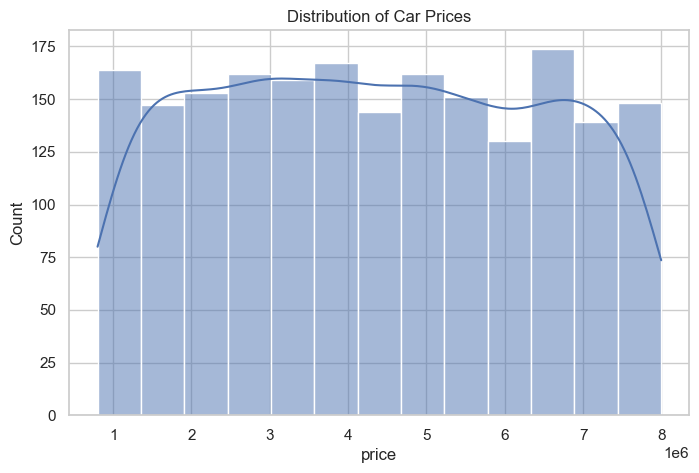

In [ ]:
# Cellule 5 : Extraction des meilleures features
from sklearn.feature_selection import SelectKBest, chi2

X = df.drop('price', axis=1)
y = df['price']

# Note : chi2 demande des valeurs positives
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

print("Scores des features :", fit.scores_)
# On peut voir ici quelles colonnes (Year, Mileage...) influencent le plus le prix

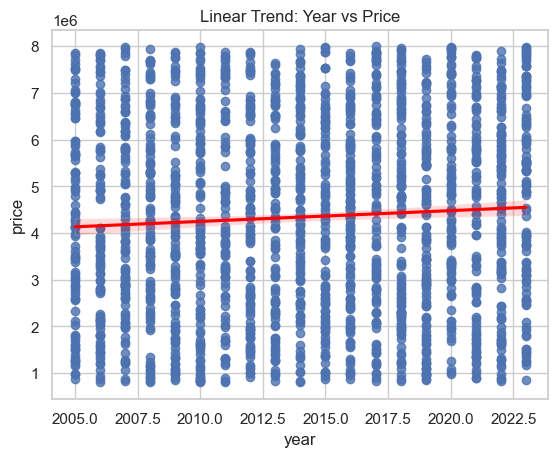

In [ ]:
# Cellule 5 : Extraction des meilleures features
from sklearn.feature_selection import SelectKBest, chi2

X = df.drop('price', axis=1)
y = df['price']

# Note : chi2 demande des valeurs positives
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

print("Scores des features :", fit.scores_)
# On peut voir ici quelles colonnes (Year, Mileage...) influencent le plus le prix

In [ ]:
# Cellule 6 : Entraînement et Evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Ou LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"R2 Score final : {r2_score(y_test, y_pred):.4f}")